### Importing the file form Gdrive 

In [1]:
! wget --header="Host: doc-0s-5o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60" --header="Cookie: AUTH_0755vv798pdukd08pbbhktdjl5q2nm63=03671904864144121079|1573358400000|bgiglstv52ctamu7esej8oncok2hmftv; _ga=GA1.2.161920535.1571674064" --header="Connection: keep-alive" "https://doc-0s-5o-docs.googleusercontent.com/docs/securesc/gkcko5omvjm8g0ffrjouskdfeosq6vei/l2v2bjkteisuv22iecmv2mcf17i22qr7/1573365600000/06629147635963609455/03671904864144121079/1jGNJNhOqbtg6Xlk6zyJGxHgKL7SgEKqh?e=download&authuser=0" -O "10_DonorsChoose_Clustering.ipynb" -c

--2019-11-12 04:42:59--  https://doc-0s-5o-docs.googleusercontent.com/docs/securesc/gkcko5omvjm8g0ffrjouskdfeosq6vei/l2v2bjkteisuv22iecmv2mcf17i22qr7/1573365600000/06629147635963609455/03671904864144121079/1jGNJNhOqbtg6Xlk6zyJGxHgKL7SgEKqh?e=download&authuser=0
Resolving doc-0s-5o-docs.googleusercontent.com (doc-0s-5o-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0s-5o-docs.googleusercontent.com (doc-0s-5o-docs.googleusercontent.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-11-12 04:43:00 ERROR 403: Forbidden.



In [2]:
pip install -U gensim --user

Requirement already up-to-date: gensim in ./.local/lib/python3.5/site-packages (3.8.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
# from gensim.models import Word2Vec
# from gensim.models import KeyedVectors
from gensim import models
import pickle
from tqdm import tqdm
import os
# from plotly import plotly
# import plotly.offline as offline
# import plotly.graph_objs as go
# offline.init_notebook_mode()
from collections import Counter

In [4]:
! wget --header="Host: doc-0k-5o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60" --header="Cookie: AUTH_0755vv798pdukd08pbbhktdjl5q2nm63=03671904864144121079|1573358400000|bgiglstv52ctamu7esej8oncok2hmftv; _ga=GA1.2.161920535.1571674064" --header="Connection: keep-alive" "https://doc-0k-5o-docs.googleusercontent.com/docs/securesc/gkcko5omvjm8g0ffrjouskdfeosq6vei/gpkvdu1ef9ln06gsgneec6ug0g0pql8b/1573365600000/06629147635963609455/03671904864144121079/1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx?e=download&authuser=0" -O "train_data.csv" -c


--2019-11-12 04:43:03--  https://doc-0k-5o-docs.googleusercontent.com/docs/securesc/gkcko5omvjm8g0ffrjouskdfeosq6vei/gpkvdu1ef9ln06gsgneec6ug0g0pql8b/1573365600000/06629147635963609455/03671904864144121079/1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx?e=download&authuser=0
Resolving doc-0k-5o-docs.googleusercontent.com (doc-0k-5o-docs.googleusercontent.com)... 172.253.123.132, 2607:f8b0:400c:c16::84
Connecting to doc-0k-5o-docs.googleusercontent.com (doc-0k-5o-docs.googleusercontent.com)|172.253.123.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-11-12 04:43:03 ERROR 403: Forbidden.



In [5]:
! wget --header="Host: doc-10-5o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60" --header="Cookie: AUTH_0755vv798pdukd08pbbhktdjl5q2nm63=03671904864144121079|1573358400000|bgiglstv52ctamu7esej8oncok2hmftv; _ga=GA1.2.161920535.1571674064" --header="Connection: keep-alive" "https://doc-10-5o-docs.googleusercontent.com/docs/securesc/gkcko5omvjm8g0ffrjouskdfeosq6vei/6k16kbq91j2vi0psk3cc5no0n26utsdj/1573365600000/06629147635963609455/03671904864144121079/1sh4p_gNyiD_tMVdMTd6F8fkJS7ysJFXK?e=download&authuser=0" -O "test_data.csv" -c

--2019-11-12 04:43:03--  https://doc-10-5o-docs.googleusercontent.com/docs/securesc/gkcko5omvjm8g0ffrjouskdfeosq6vei/6k16kbq91j2vi0psk3cc5no0n26utsdj/1573365600000/06629147635963609455/03671904864144121079/1sh4p_gNyiD_tMVdMTd6F8fkJS7ysJFXK?e=download&authuser=0
Resolving doc-10-5o-docs.googleusercontent.com (doc-10-5o-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-10-5o-docs.googleusercontent.com (doc-10-5o-docs.googleusercontent.com)|173.194.216.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-11-12 04:43:03 ERROR 403: Forbidden.



In [6]:
! wget --header="Host: doc-0c-5o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60" --header="Cookie: AUTH_0755vv798pdukd08pbbhktdjl5q2nm63=03671904864144121079|1573358400000|bgiglstv52ctamu7esej8oncok2hmftv; _ga=GA1.2.161920535.1571674064" --header="Connection: keep-alive" "https://doc-0c-5o-docs.googleusercontent.com/docs/securesc/gkcko5omvjm8g0ffrjouskdfeosq6vei/rgh68f4l3rr22jda2ddffce5776u5aa1/1573365600000/06629147635963609455/03671904864144121079/14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe?e=download&authuser=0" -O "resources.csv" -c

--2019-11-12 04:43:03--  https://doc-0c-5o-docs.googleusercontent.com/docs/securesc/gkcko5omvjm8g0ffrjouskdfeosq6vei/rgh68f4l3rr22jda2ddffce5776u5aa1/1573365600000/06629147635963609455/03671904864144121079/14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe?e=download&authuser=0
Resolving doc-0c-5o-docs.googleusercontent.com (doc-0c-5o-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0c-5o-docs.googleusercontent.com (doc-0c-5o-docs.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-11-12 04:43:03 ERROR 403: Forbidden.



In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns)

Number of data points in train data (1541272, 4)
Index(['id', 'description', 'quantity', 'price'], dtype='object')


### Text Preprocessing : 

In [6]:
catogories = list(project_data['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','')
        j = j.replace(' ','') 
        temp+=j.strip()+" " 
        temp = temp.replace('&','_')  
    cat_list.append(temp.strip())

In [7]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language


In [8]:
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())
my_counter

Counter({'AppliedLearning': 12135,
         'Care_Hunger': 1388,
         'Health_Sports': 14223,
         'History_Civics': 5914,
         'Literacy_Language': 52239,
         'Math_Science': 41421,
         'Music_Arts': 10293,
         'SpecialNeeds': 13642,
         'Warmth': 1388})

In [9]:
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    for j in i.split(','):
        if 'The' in j.split(): 
            j=j.replace('The','')
        j = j.replace(' ','') 
        temp +=j.strip()+" "
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [11]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


In [12]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

In [13]:
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [14]:
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [15]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,quantity,price
0,p000001,7,459.56
1,p000002,21,515.89


In [16]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [17]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,quantity,price
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,23,154.6
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,1,299.0


In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub('nannan', '', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:56<00:00, 1931.53it/s]


In [21]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for title in tqdm(project_data['project_title'].values):
    _title = decontracted(title)
    _title = _title.replace('\\r', ' ')
    _title = _title.replace('\\"', ' ')
    _title = _title.replace('\\n', ' ')
    _title = re.sub('[^A-Za-z0-9]+', ' ', _title)
    # https://gist.github.com/sebleier/554280
    _title = ' '.join(e for e in _title.split() if e not in stopwords)
    preprocessed_titles.append(_title.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 47793.85it/s]


In [22]:
project_grade_catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

project_grade_cat_list = []
for i in tqdm(project_grade_catogories):
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    project_grade_cat_list.append(temp.strip())

100%|██████████| 109248/109248 [00:00<00:00, 797166.58it/s]


In [23]:
project_data['clean_project_grade_category'] = project_grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,quantity,price,clean_project_grade_category
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,23,154.6,GradesPreK-2
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,1,299.0,Grades6-8


In [24]:
project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,quantity,price,clean_project_grade_category
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,23,154.6,GradesPreK-2
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,1,299.0,Grades6-8


In [25]:
#Replacing Nan's with maximum occured value: https://stackoverflow.com/a/51053916/8089731
project_data['teacher_prefix'].value_counts().argmax()
project_data.fillna(value=project_data['teacher_prefix'].value_counts().argmax(),axis=1,inplace=True)

In [26]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data['preprocessed_titles'] = preprocessed_titles

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'quantity', 'price',
       'clean_project_grade_category', 'preprocessed_essays',
       'preprocessed_titles'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])

X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73196, 17)
(36052, 17)
(73196,)
(36052,)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_cat.fit(X_train['clean_categories'].values)
print(vectorizer_cat.get_feature_names())


categories_one_hot_train = vectorizer_cat.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_cat.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encodig_train ",categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig_test ",categories_one_hot_test.shape)

['AppliedLearning', 'Warmth', 'Literacy_Language', 'SpecialNeeds', 'Math_Science', 'Care_Hunger', 'Music_Arts', 'Health_Sports', 'History_Civics']
Shape of matrix after one hot encodig_train  (73196, 9)
Shape of matrix after one hot encodig_test  (36052, 9)


In [30]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer_sub_cat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_cat.fit(X_train['clean_subcategories'].values)
print(vectorizer_sub_cat.get_feature_names())
sub_categories_one_hot_train = vectorizer_sub_cat.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_cat.transform(X_test['clean_subcategories'].values)
print("Shape of matrix after one hot encodig_train ",sub_categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig_test ",sub_categories_one_hot_test.shape)

['Warmth', 'FinancialLiteracy', 'ForeignLanguages', 'Literature_Writing', 'Extracurricular', 'Health_Wellness', 'ESL', 'EarlyDevelopment', 'EnvironmentalScience', 'CharacterEducation', 'SpecialNeeds', 'Care_Hunger', 'ParentInvolvement', 'AppliedSciences', 'Economics', 'Other', 'History_Geography', 'Music', 'PerformingArts', 'Mathematics', 'VisualArts', 'College_CareerPrep', 'NutritionEducation', 'Literacy', 'Gym_Fitness', 'Civics_Government', 'SocialSciences', 'TeamSports', 'CommunityService', 'Health_LifeScience']
Shape of matrix after one hot encodig_train  (73196, 30)
Shape of matrix after one hot encodig_test  (36052, 30)


In [31]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_state = CountVectorizer( lowercase=False, binary=True)
vectorizer_state.fit(X_train['school_state'].values)
print(vectorizer_state.get_feature_names())
school_state_one_hot_train = vectorizer_state.transform(X_train['school_state'].values)
school_state_one_hot_test = vectorizer_state.transform(X_test['school_state'].values)
print("Shape of matrix after one hot encodig_train ",school_state_one_hot_train.shape)
print("Shape of matrix after one hot encodig_test ",school_state_one_hot_test.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig_train  (73196, 51)
Shape of matrix after one hot encodig_test  (36052, 51)


In [32]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_teacherprefix = CountVectorizer( lowercase=False, binary=True)
vectorizer_teacherprefix.fit(X_train['teacher_prefix'].values.astype('U'))
print(vectorizer_teacherprefix.get_feature_names())

#https://stackoverflow.com/a/39308809/8089731
teacher_prefix_one_hot_train = vectorizer_teacherprefix.transform(X_train['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_test = vectorizer_teacherprefix.transform(X_test['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig_train ",teacher_prefix_one_hot_train.shape)
print("Shape of matrix after one hot encodig_test ",teacher_prefix_one_hot_test.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig_train  (73196, 5)
Shape of matrix after one hot encodig_test  (36052, 5)


In [33]:
print(project_data['clean_project_grade_category'].unique())
from sklearn.feature_extraction.text import CountVectorizer
# https://stackoverflow.com/a/38161028/8089731
pattern = "(?u)\\b[\\w-]+\\b" # here we use this pattren to not divide the word "Grade-4"
vectorizer_projectgrade = CountVectorizer(token_pattern=pattern, lowercase=False, binary=True)
vectorizer_projectgrade.fit(X_train['clean_project_grade_category'].values)
print(vectorizer_projectgrade.get_feature_names())
project_grade_category_one_hot_train = vectorizer_projectgrade.transform(X_train['clean_project_grade_category'].values)
project_grade_category_one_hot_test = vectorizer_projectgrade.transform(X_test['clean_project_grade_category'].values)
print("Shape of matrix after one hot encodig_train ",project_grade_category_one_hot_train.shape)
print("Shape of matrix after one hot encodig_test ",project_grade_category_one_hot_test.shape)

['GradesPreK-2' 'Grades6-8' 'Grades3-5' 'Grades9-12']
['Grades3-5', 'Grades6-8', 'Grades9-12', 'GradesPreK-2']
Shape of matrix after one hot encodig_train  (73196, 4)
Shape of matrix after one hot encodig_test  (36052, 4)


In [34]:
from sklearn.preprocessing import normalize

price_standardized_train = normalize(X_train['price'].values.reshape(-1, 1),axis=0)
price_standardized_test = normalize(X_test['price'].values.reshape(-1, 1),axis=0)
print(price_standardized_train.shape)
print(price_standardized_test.shape)

(73196, 1)
(36052, 1)


In [35]:
from sklearn.preprocessing import normalize

quantity_standardized_train = normalize(X_train['quantity'].values.reshape(-1, 1),axis=0)
quantity_standardized_test = normalize(X_test['quantity'].values.reshape(-1, 1),axis=0)
print(quantity_standardized_train.shape)
print(quantity_standardized_test.shape)

(73196, 1)
(36052, 1)


In [36]:
from sklearn.preprocessing import normalize
teacher_number_of_previously_posted_projects_standardized_train = normalize(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1),axis=0)
teacher_number_of_previously_posted_projects_standardized_test = normalize(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1),axis=0)
print(teacher_number_of_previously_posted_projects_standardized_train.shape)
print(teacher_number_of_previously_posted_projects_standardized_test.shape)

(73196, 1)
(36052, 1)


In [37]:
X_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,quantity,price,clean_project_grade_category,preprocessed_essays,preprocessed_titles
42409,55485,p152490,92361e19b93a48e7d913eaf919a0e93d,Mrs.,WI,2016-10-11 20:50:07,"\""Rock and Read\"" With Children","My students need rocking chairs, so that carin...",0,AppliedLearning Literacy_Language,EarlyDevelopment Literacy,"In a time where, in some circumstances, techno...",18,177.73,GradesPreK-2,in time circumstances technology advancements ...,rock read with children
99767,117942,p131246,876a537eced0d6b10a336ece04bcdd1d,Mrs.,PA,2017-01-06 17:34:59,Protect and Serve Young Minds,My students need I-pad covers to protect our u...,3,Math_Science,Mathematics,My second grade classroom is filled with class...,30,40.99,GradesPreK-2,my second grade classroom filled classroom boo...,protect serve young minds


### TFIDF Vectorizer for converting text data into Vectors.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essays = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))
vectorizer_tfidf_essays.fit(X_train['preprocessed_essays'])

text_tfidf_train = vectorizer_tfidf_essays.transform(X_train['preprocessed_essays'])
text_tfidf_test = vectorizer_tfidf_essays.transform(X_test['preprocessed_essays'])
print("Shape of matrix after tfidf_text_train ",text_tfidf_train.shape)
print("Shape of matrix after tfidf_text_test ",text_tfidf_test.shape)

Shape of matrix after tfidf_text_train  (73196, 5000)
Shape of matrix after tfidf_text_test  (36052, 5000)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(X_train['preprocessed_titles'])

title_tfidf_train = vectorizer_tfidf_title.transform(X_train['preprocessed_titles'])
# title_tfidf_cv = vectorizer_tfidf_title.transform(X_cv['preprocessed_titles'])
title_tfidf_test = vectorizer_tfidf_title.transform(X_test['preprocessed_titles'])
print("Shape of matrix after tfidf_title_train ",title_tfidf_train.shape)
# print("Shape of matrix after tfidf_title_cv ",title_tfidf_cv.shape)
print("Shape of matrix after tfidf_title_test ",title_tfidf_test.shape)

Shape of matrix after tfidf_title_train  (73196, 2619)
Shape of matrix after tfidf_title_test  (36052, 2619)


In [40]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'quantity', 'price',
       'clean_project_grade_category', 'preprocessed_essays',
       'preprocessed_titles'],
      dtype='object')

In [41]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train
               ,project_grade_category_one_hot_train,price_standardized_train,quantity_standardized_train
               ,teacher_number_of_previously_posted_projects_standardized_train,text_tfidf_train,title_tfidf_train))
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test
               ,project_grade_category_one_hot_test,price_standardized_test,quantity_standardized_test
               ,teacher_number_of_previously_posted_projects_standardized_test,text_tfidf_test,title_tfidf_test))

print("Final Data matrix after stacking all the features")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data matrix after stacking all the features
(73196, 7721) (73196,)
(36052, 7721) (36052,)


In [42]:
from sklearn.feature_selection import SelectKBest, chi2
t = SelectKBest(chi2,k=5000).fit(X_tr, y_train)
X_tr = t.transform(X_tr)
X_te = t.transform(X_te)

In [43]:
print("Final Data matrix after Dimensional reduction")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix after Dimensional reduction
(73196, 5000) (73196,)
(36052, 5000) (36052,)


### Applying the K-Means algorithm 

In [48]:
from sklearn.cluster import KMeans
k_values = [5, 10, 15, 25, 30]
loss = []
for i in tqdm(k_values):
    kmeans = KMeans(n_clusters=i, n_jobs=-1).fit(X_tr)
    loss.append(kmeans.inertia_)

100%|██████████| 5/5 [51:18<00:00, 615.78s/it]


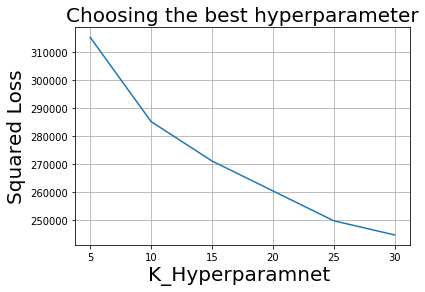

In [49]:
plt.plot(k_values , loss)
plt.xlabel("K_Hyperparamnet ",size= 20)
plt.ylabel("Squared Loss",size= 20)
plt.title("Choosing the best hyperparameter", size = 20)
plt.grid()
plt.show()

In [50]:
K = 15 # < choosen by heyper-parameter tuning >

kmeans = KMeans(n_clusters=K, n_jobs=-1).fit(X_tr)

In [51]:
essays = X_train['preprocessed_essays'].values

cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
cluster10 = []
cluster11 = []
cluster12 = []
cluster13 = []
cluster14 = []
for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster0.append(essays[i])
    elif kmeans.labels_[i] == 1:
        cluster1.append(essays[i])
    elif kmeans.labels_[i] == 2:
        cluster2.append(essays[i])
    elif  kmeans.labels_[i] == 3:
        cluster3.append(essays[i])
    elif  kmeans.labels_[i] == 4:
        cluster4.append(essays[i])
    elif  kmeans.labels_[i] == 5:
        cluster5.append(essays[i])
    elif  kmeans.labels_[i] == 6:
        cluster6.append(essays[i])
    elif  kmeans.labels_[i] == 7:
        cluster7.append(essays[i])    
    elif  kmeans.labels_[i] == 8:
        cluster8.append(essays[i])
    elif  kmeans.labels_[i] == 9:
        cluster9.append(essays[i])
    elif  kmeans.labels_[i] == 10:
        cluster10.append(essays[i])
    elif  kmeans.labels_[i] == 11:
        cluster11.append(essays[i])
    elif  kmeans.labels_[i] == 12:
        cluster12.append(essays[i])
    elif  kmeans.labels_[i] == 13:
        cluster13.append(essays[i])
    elif  kmeans.labels_[i] == 14:
        cluster14.append(essays[i])

In [52]:
cluster = [cluster1 ,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,\
cluster11,cluster12,cluster13,cluster14] 


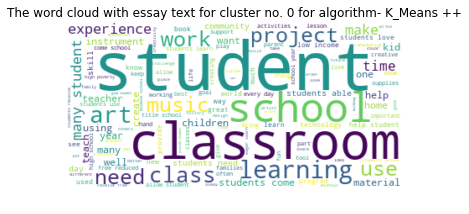

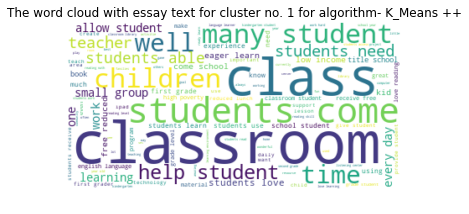

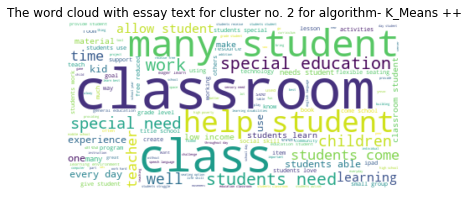

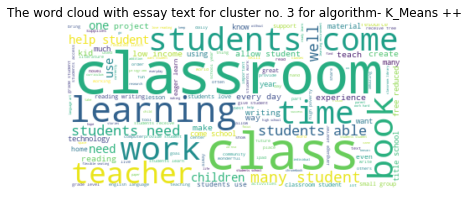

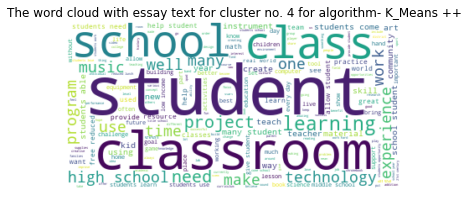

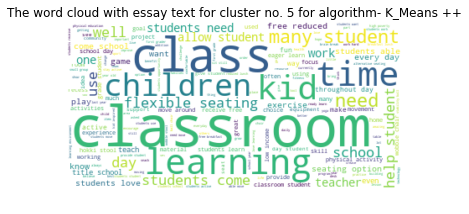

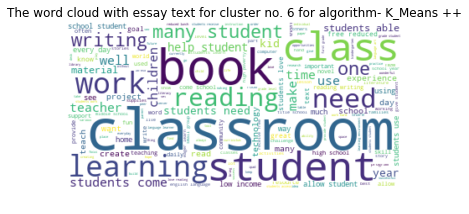

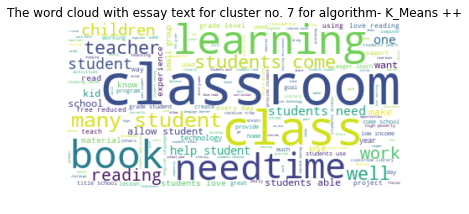

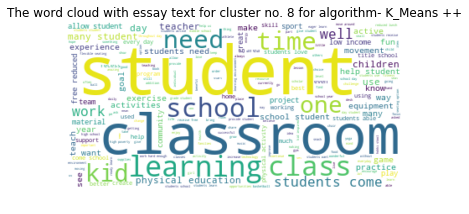

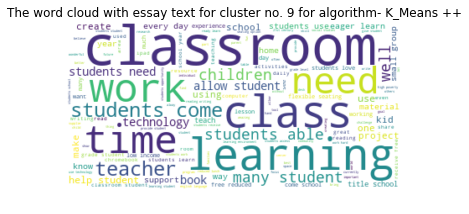

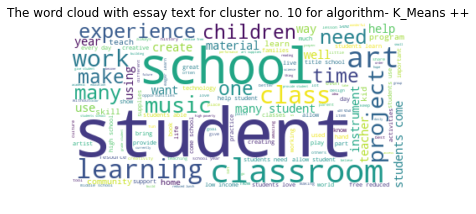

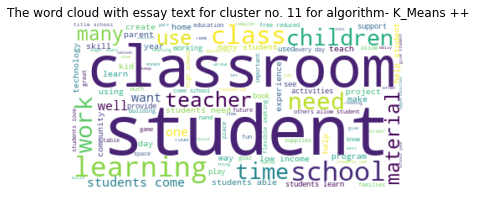

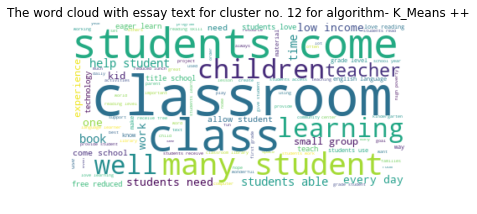

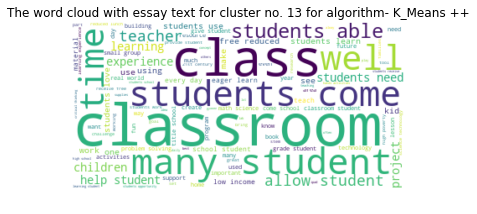

In [53]:
from wordcloud import WordCloud
for i in range(14):
    words=''
#     for j in range(15):
    for h in cluster[i]:
        words+=str(h)
    from wordcloud import WordCloud
    wordcloud = WordCloud(background_color="white").generate(words)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('The word cloud with essay text for cluster no. %s for algorithm- %s'%(i, "K_Means ++"))
    plt.show()

### 2.6  Apply AgglomerativeClustering

In [54]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train
               ,project_grade_category_one_hot_train,price_standardized_train,quantity_standardized_train
               ,teacher_number_of_previously_posted_projects_standardized_train,text_tfidf_train,title_tfidf_train))
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test
               ,project_grade_category_one_hot_test,price_standardized_test,quantity_standardized_test
               ,teacher_number_of_previously_posted_projects_standardized_test,text_tfidf_test,title_tfidf_test))

print("Final Data matrix ")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix 
(73196, 7736) (73196,)
(36052, 7736) (36052,)


In [55]:
from sklearn.feature_selection import SelectKBest, chi2
t = SelectKBest(chi2,k=5000).fit(X_tr, y_train)
X_tr = t.transform(X_tr)
X_te = t.transform(X_te)

In [56]:
X_tr = X_tr[:5000]
X_train = X_train[:5000]

In [57]:
print(X_tr.shape)
print(X_train.shape)

(5000, 5000)
(5000, 17)


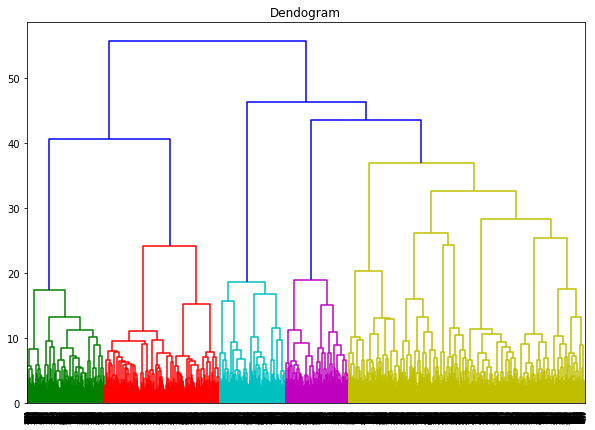

In [58]:
# the code is reffred form https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
import scipy.cluster.hierarchy as shc
X_tr = X_tr.toarray()
algo_title = 'Agglomerative Clustering'
plt.figure(figsize=(10, 7))  
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(X_tr, method='ward'))

#### The Dendogram reprents the tottal number of clusters are 5 

In [59]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_tr)

array([0, 0, 4, ..., 1, 0, 1])

In [60]:
essays = X_train['preprocessed_essays'].values

cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
for i in range(cluster.labels_.shape[0]):
    if cluster.labels_[i] == 0:
        cluster0.append(essays[i])
    elif cluster.labels_[i] == 1:
        cluster1.append(essays[i])
    elif cluster.labels_[i] == 2:
        cluster2.append(essays[i])
    elif  cluster.labels_[i] == 3:
        cluster3.append(essays[i])
    elif  cluster.labels_[i] == 4:
        cluster4.append(essays[i])
    elif  cluster.labels_[i] == 5:
        cluster5.append(essays[i])

In [61]:
cluster = [cluster0,cluster1,cluster2,cluster3,cluster4,cluster5]

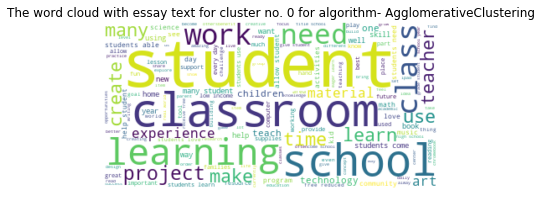

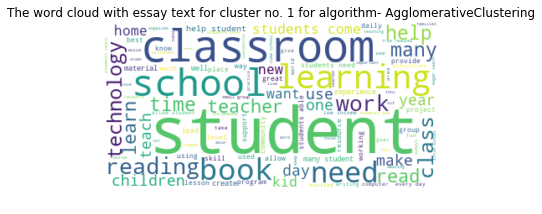

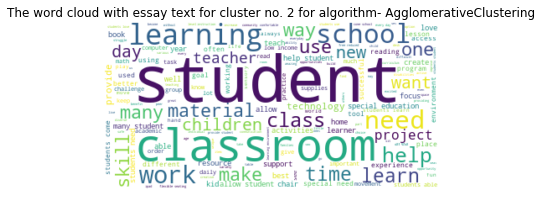

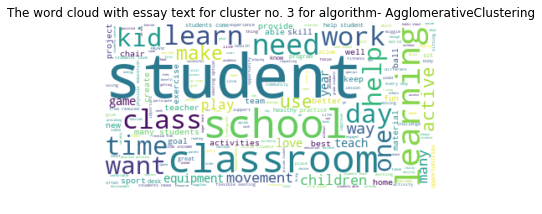

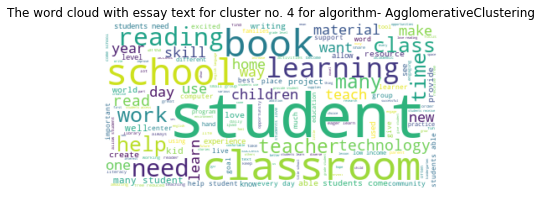

In [62]:
from wordcloud import WordCloud
for i in range(5):
    words=''
    for h in cluster[i]:
        words+=str(h)
    from wordcloud import WordCloud
    wordcloud = WordCloud(background_color="white").generate(words)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('The word cloud with essay text for cluster no. %s for algorithm- %s'%(i, "AgglomerativeClustering"))
    plt.show()

#### 2.7 Apply DBSCAN

In [60]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train
               ,project_grade_category_one_hot_train,price_standardized_train,quantity_standardized_train
               ,teacher_number_of_previously_posted_projects_standardized_train,text_tfidf_train,title_tfidf_train))
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test
               ,project_grade_category_one_hot_test,price_standardized_test,quantity_standardized_test
               ,teacher_number_of_previously_posted_projects_standardized_test,text_tfidf_test,title_tfidf_test))

print("Final Data Matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data Matrix
(73196, 7721) (73196,)
(36052, 7721) (36052,)


In [62]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif 
t = SelectKBest(f_classif,k=5000).fit(X_tr, y_train)
X_tr = t.transform(X_tr)
X_te = t.transform(X_te)
print("Final Data Matrix after selecting the K best features")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data Matrix after selecting the K best features
(73196, 5000) (73196,)
(36052, 5000) (36052,)


In [63]:
X_tr = X_tr[:5000]
X_train = X_train[:5000]
print("Final Data Matrix after selecting the K best features")
print(X_tr.shape, y_train.shape)

Final Data Matrix after selecting the K best features
(5000, 5000) (73196,)


In [47]:
# this conversation can also be done to dence matrix also orlese to array is also fine . 
# from sklearn.preprocessing import StandardScaler
# data=X_tr.toarray()
# data

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
data = X_tr.todense()[:5000]

##### In DBScan there are two hyper- parameters.
1. EPS and Min-points.
2. There are Multiple ways for finding the the rules fo thumb the Min- point should be 2 * Dimensions of the data ,
to avoid the noise points the the min points must be very high . 


In [67]:
# https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/
# https://www.geeksforgeeks.org/ml-semi-supervised-learning/
# https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d
# to find the pair wise distance between the metrix : this method can be used but we have to consider only the points

# from sklearn.metrics.pairwise import euclidean_distances
# euclidean_distances(data, data[1].reshape(1, -1))

# min_points = 1500
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics.pairwise import euclidean_distances
# datt=StandardScaler().fit_transform(dat)

# distance=[]
# for point in tqdm1(datt):
#     temp = euclidean_distances(datt, point.reshape(1, -1))
#     distance.append(temp[min_points])
# sorted_distance = np.sort(np.array(distance))

# sorted_dist = np.sort(sorted_distance.reshape(1,-1)[0])
# points = [i for i in range(len(datt))]


# # Draw distances(d_i) VS points(x_i) plot
# plt.plot(points, sorted_dist)
# plt.xlabel('Points')
# plt.ylabel('dist')
# plt.title('dist VS Points')
# plt.grid()
# plt.show()

# the other method of Comparing the distance is using the KDtree fo rfind out the distance 


array([[3.33836597e+00],
       [5.96046448e-08],
       [3.68444565e+00],
       ...,
       [3.18733481e+00],
       [3.07898141e+00],
       [3.24406547e+00]])

done


  0%|          | 2/5000 [00:00<05:29, 15.19it/s]

done


100%|██████████| 5000/5000 [02:51<00:00, 29.15it/s]

Done


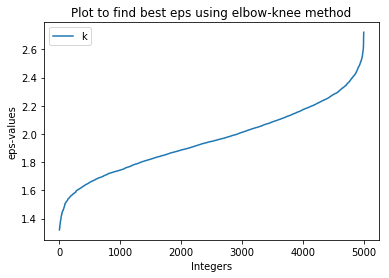

In [65]:
# here we are considering the Min points as 8 becuase of the below refrence .
# https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r/48558030#
# https://www.google.com/search?q=ln(5000)&oq=ln(5000)&aqs=chrome..69i57j6.4390j0j7&sourceid=chrome&ie=UTF-8
# ln(5000)= 8  =====> min point's

from sklearn.neighbors import KDTree
minPts = 8
print("done")
tree = KDTree(data)
print("done")
idx = 0
epss = []
for x_i in tqdm(data):
    epss.append(tree.query(data[idx], return_distance=True, k=minPts)[0][0][-1])
    idx += 1
epss.sort()
print("Done")
plt.plot(range(0,5000), epss[:5000])
plt.title("Plot to find best eps using elbow-knee method")
plt.xlabel('Integers')
plt.ylabel('eps-values')
plt.legend('kneee')

In [72]:
# the optiminal value is 19 
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=2.4, min_samples=minPts).fit(data)

In [75]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
# number of sample in Dbsacn is
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

n_clusters_ = len(set(cluster.labels_)) - (1 if -1 in cluster.labels_ else 0)
n_noise_ = list(cluster.labels_).count(-1)
print("Number of cluster's without Noise are " , n_clusters_)
print("Number of cluster's with  Noise are " , n_noise_)
print('No of clusters: ',len(set(cluster.labels_)))
print('Cluster are including noise i.e -1: ',set(cluster.labels_))

Number of cluster's without Noise are  2
Number of cluster's with  Noise are  10
No of clusters:  3
Cluster are including noise i.e -1:  {0, 1, -1}


In [82]:
essays = X_train['preprocessed_essays'].values
cluster1=[]
noisecluster1=[]
for i in range(cluster.labels_.shape[0]):
    if cluster.labels_[i] == 0 or cluster.labels_[i] == 1:
        cluster1.append(essays[i])
    elif cluster.labels_[i] == -1:
        noisecluster1.append(essays[i])

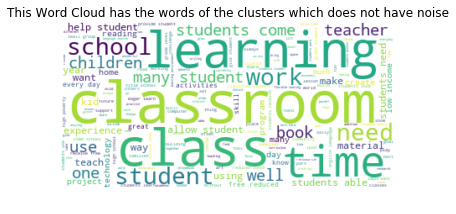

In [85]:
#cluster 1
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("This Word Cloud has the words of the clusters which does not have noise")
plt.show()

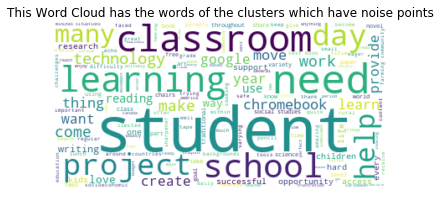

In [86]:
#noise cluster 1
words=''
for i in noisecluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("This Word Cloud has the words of the clusters which have noise points")
plt.show()

### Conclusion :


In [88]:
#prettytable for kmeans
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names =  ["Model","Vectorizer","Clusters","Eps","Min-points"]
x.add_row(["K-means++",'TFIDF','15',"-","-"])
x.add_row(["Agglomerative",'TFIDF','5',"-","-"])
x.add_row(["DBScan",'TFIDF','3',"2.4","8"])
print(x)

+---------------+------------+----------+-----+------------+
|     Model     | Vectorizer | Clusters | Eps | Min-points |
+---------------+------------+----------+-----+------------+
|   K-means++   |   TFIDF    |    15    |  -  |     -      |
| Agglomerative |   TFIDF    |    5     |  -  |     -      |
|     DBScan    |   TFIDF    |    3     | 2.4 |     8      |
+---------------+------------+----------+-----+------------+
